In [30]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

key="0fb86b1ececc7df615c556bb33f5445e7489e2f8"


In [31]:
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,6,15)


In [32]:
google = web.DataReader("GOOGL",'yahoo',start,end)
google.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,1757.500000,1736.089966,1737.270020,1752.640015,1053500,1752.640015
2021-01-04,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005
2021-01-05,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049
2021-01-06,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005
2021-01-07,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966


In [33]:

google.to_csv('Google_Stock.csv')

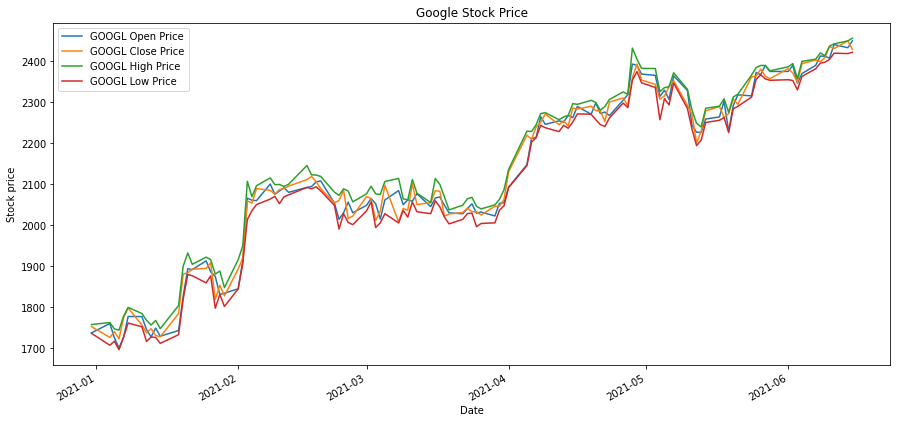

In [34]:

google ['Open'].plot(label='GOOGL Open Price',figsize=(15,7))
google ['Close'].plot(label='GOOGL Close Price')
google ['High'].plot(label='GOOGL High Price')
google ['Low'].plot(label='GOOGL Low Price')
plt.legend()
plt.title('Google Stock Price')
plt.ylabel('Stock price')
plt.show()

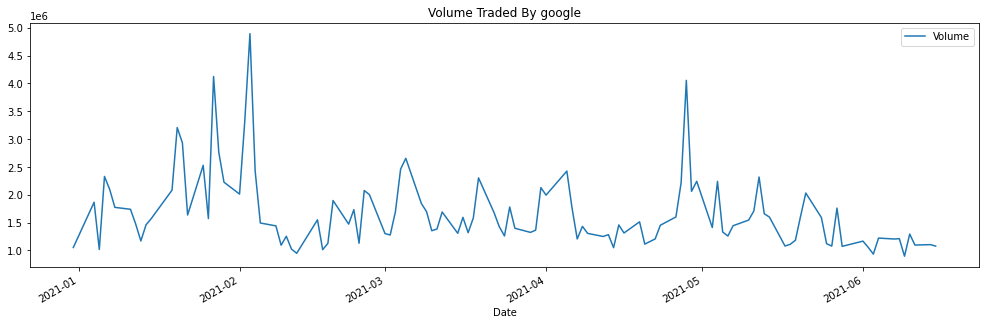

In [35]:
google['Volume'].plot(figsize=(17,5))
plt.title('Volume Traded By google')
plt.legend()

In [36]:
google['returns']=(google['Close']/google['Close'].shift(1))-1
google['Cumulative Return'] =(1+google['returns']).cumprod()

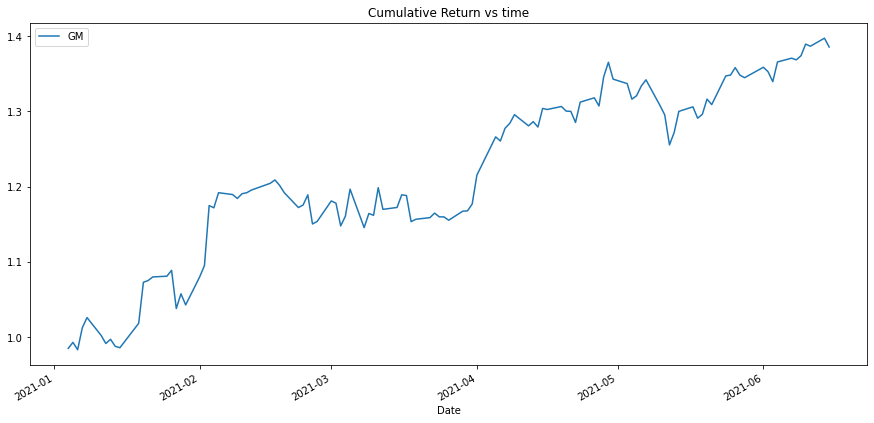

In [37]:
google['Cumulative Return'].plot(label='GM',figsize=(15,7))
plt.title('Cumulative Return vs time')
plt.legend()

In [38]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,returns,Cumulative Return
Date,,,,,,,,
2020-12-31,1757.500000,1736.089966,1737.270020,1752.640015,1053500,1752.640015,NaN,NaN
2021-01-04,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005,-0.015126,0.984874
2021-01-05,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049,0.008064,0.992817
2021-01-06,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005,-0.009868,0.983020
2021-01-07,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966,0.029869,1.012381


In [39]:
#Collecting stock data from API
df = pdr.get_data_tiingo('GOOGL', api_key=key)
df.to_csv('GOOGL.csv')


In [40]:
df=pd.read_csv('GOOGL.csv')

In [41]:
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2016-06-20 00:00:00+00:00,706.13,715.87,705.41,710.31,2282725,706.13,715.87,705.41,710.31,2282725,0.0,1.0
1,GOOGL,2016-06-21 00:00:00+00:00,708.88,715.38,704.66,710.05,1515918,708.88,715.38,704.66,710.05,1515918,0.0,1.0
2,GOOGL,2016-06-22 00:00:00+00:00,710.47,714.21,705.88,714.05,1452884,710.47,714.21,705.88,714.05,1452884,0.0,1.0
3,GOOGL,2016-06-23 00:00:00+00:00,714.87,714.88,700.25,710.55,2125028,714.87,714.88,700.25,710.55,2125028,0.0,1.0
4,GOOGL,2016-06-24 00:00:00+00:00,685.20,705.00,684.91,690.17,4771780,685.20,705.00,684.91,690.17,4771780,0.0,1.0


In [42]:
df.tail()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,GOOGL,2021-06-14 00:00:00+00:00,2448.91,2448.92,2418.00,2432.26,1104878,2448.91,2448.92,2418.00,2432.26,1104878,0.0,1.0
1255,GOOGL,2021-06-15 00:00:00+00:00,2428.39,2455.51,2421.12,2449.00,1078107,2428.39,2455.51,2421.12,2449.00,1078107,0.0,1.0
1256,GOOGL,2021-06-16 00:00:00+00:00,2415.45,2437.72,2389.40,2431.44,1316557,2415.45,2437.72,2389.40,2431.44,1316557,0.0,1.0
1257,GOOGL,2021-06-17 00:00:00+00:00,2434.87,2450.45,2410.00,2413.95,1292444,2434.87,2450.45,2410.00,2413.95,1292444,0.0,1.0
1258,GOOGL,2021-06-18 00:00:00+00:00,2402.22,2432.06,2400.30,2427.34,2259235,2402.22,2432.06,2400.30,2427.34,2259235,0.0,1.0


In [43]:
df1=df.reset_index()['close']

In [44]:
df1.shape

(1259,)

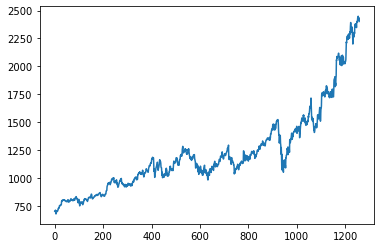

In [45]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [58]:
import numpy as np
import keras as k

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler


In [61]:
#preprocessing data(train and test)
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [64]:
import numpy
import keras as k
# convert an array of values into a dataset matrix
#defining a method 
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    
    return np.array(dataX), np.array(dataY)

In [65]:
# reshape 
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [66]:
# reshape input to be 3d data[samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [67]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [68]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


NotImplementedError: Cannot convert a symbolic Tensor (lstm_7/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [24]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))



NotImplementedError: Cannot convert a symbolic Tensor (lstm_5/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [20]:
model.summary()


ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

NameError: name 'X_train' is not defined